# Домашнее задание по статистическому анализу на python

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [128]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [129]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Равномерное распределение
??? подскажите, пожалуйста, как разместить два графика рядом, например, по-горизонтали (на разных подложках, чтобы один не перекрывал другой)

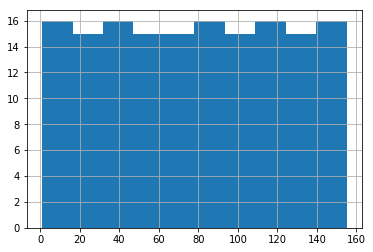

In [130]:
df["Freedom"].hist()

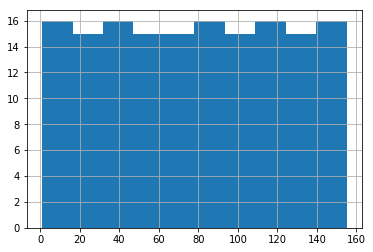

In [131]:
df["Positive affect"].hist()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [132]:
import statistics

freedom = df['Freedom']
freedom_clear = df['Freedom'].dropna()
print('Медиана: ', statistics.median(freedom_clear))
#print('Мода: ', statistics.mode(freedom_clear))
print('Мат ожидание: ', statistics.mean(freedom_clear))
print('Стандартное отклонение: ', statistics.stdev(freedom_clear))
print('Дисперсия: ', statistics.stdev(freedom_clear) ** 2)
print('Минимум: ', min(freedom_clear))
print('Максимум: ', max(freedom_clear))
print('Размах: ', max(freedom_clear) - min(freedom_clear))
print('Отсутствует значение: ', df['Freedom'].isnull().sum())

Медиана:  78.0
Мат ожидание:  78.0
Стандартное отклонение:  44.88875137492688
Дисперсия:  2015.0000000000002
Минимум:  1.0
Максимум:  155.0
Размах:  154.0
Отсутствует значение:  1


In [133]:
#автоматический расчет моды выдаёт сообщение о том, что найдено несколько одинаково частотных значений (что логично, т.к. распределение у нас равномерное)
print('Мода: ', statistics.mode(freedom_clear))

StatisticsError: no unique mode; found 155 equally common values

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

??? Подскажите, пожалуйста, коэффициент Пирсона можно всё-таки использовать только для нормальных распределений? в лекции это указано текстом http://prntscr.com/p88cym, но на сколько я поняла, в примере мы его считали без каких-то преобразований исходных данных

Коэффициент корреляции Пирсона: 0.6817698430601656


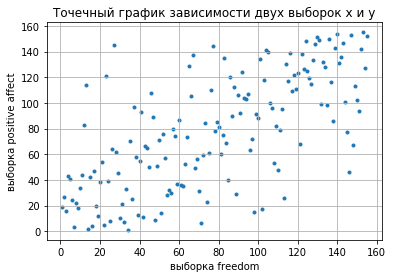

In [134]:
freedom = df['Freedom'].dropna()
pos_effect = df['Positive affect'].dropna()
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, pos_effect, marker='.')

from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, pos_effect)
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [135]:
freedom_center = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_center))

0.0


In [136]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_scale = min_max_scaler.fit_transform(np.array(freedom_center).reshape(-1, 1))
print(min(freedom_scale))
print(max(freedom_scale))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

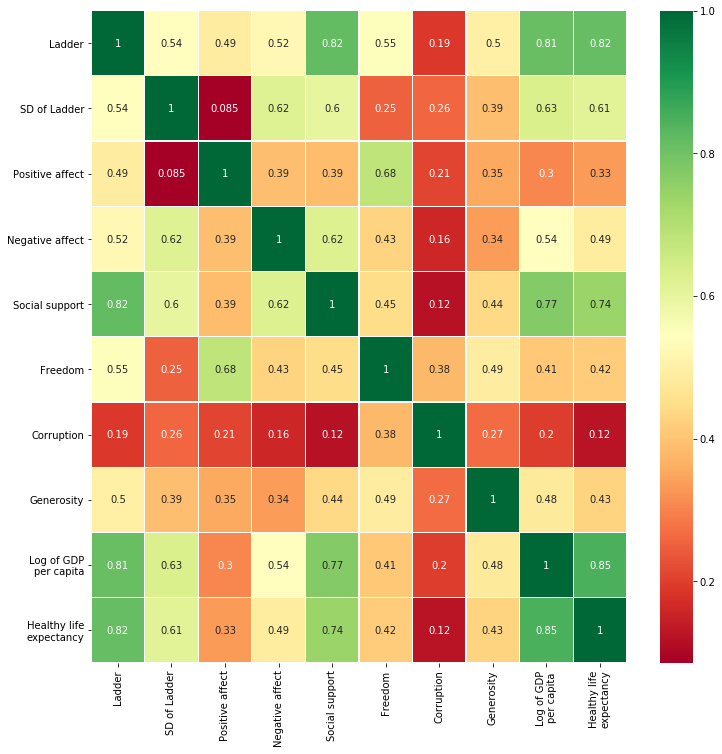

In [137]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [138]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_2=pd.read_csv(url)
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

похоже на нормальное с некоторыми отклонениями

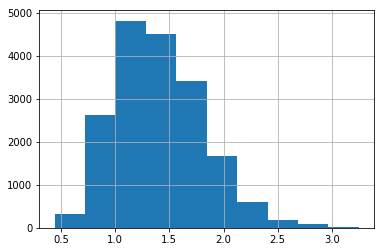

In [140]:
df_2.AveragePrice.hist()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.20831704848788477


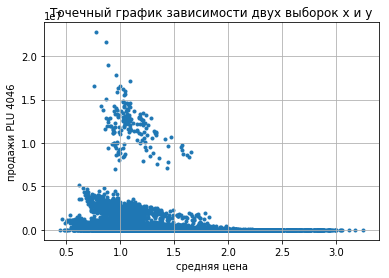

In [141]:
avocado_sold = df_2['4046'].dropna()
avg_price = df_2['AveragePrice'].dropna()
plt.xlabel('средняя цена')
plt.ylabel('продажи PLU 4046')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(avg_price, avocado_sold, marker='.')

from scipy.stats import pearsonr
corr, p_value = pearsonr(avg_price, avocado_sold)
print('Коэффициент корреляции Пирсона:', corr)

In [145]:
avocado_sold.count()
avocado_sold[avocado_sold > 0.5 * 10 ** 7].count() 
avocado_sold.count() 
print("кол-во значений - выбросов по кол-ву продаж в %: ", avocado_sold[avocado_sold> 0.5 * 10 ** 7].count() * 100.0 / avocado_sold.count())

кол-во значений - выбросов в %:  0.9315578935832101


пересчитаем без них

Коэффициент корреляции Пирсона: -0.341736119942076


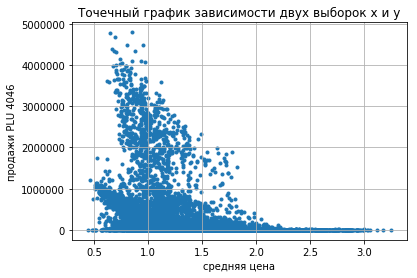

In [147]:
#??? подскажите, как в одну строчку  можно получить серию с фильтром по значению только с цифрами в названии колонки?
filter_4046 = df_2['4046'] < 0.5 * 10 ** 7
clear_df = df_2.loc[filter_4046]
avocado_sold = clear_df['4046'].dropna()
avg_price = clear_df['AveragePrice'].dropna()
plt.xlabel('средняя цена')
plt.ylabel('продажи PLU 4046')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(avg_price, avocado_sold, marker='.')
from scipy.stats import pearsonr
corr, p_value = pearsonr(avg_price, avocado_sold)
print('Коэффициент корреляции Пирсона:', corr)

Видим, что коэффициент корреляции увеличился хотя выборку мы сократили всего на 1% (помним, что метод плохо работает с выбросами, возможно, стоит ещё ужесточить фильтр на кол-во продаж.